In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import binom



In [ ]:
df = pd.read_csv('populacao_brasileira.csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.estado.unique()

array(['MA', 'BA', 'AM', 'CE', 'SE', 'DF', 'PI', 'AP', 'AC', 'SC', 'SP',
       'GO', 'RO', 'PA', 'MS', 'RN', 'RS', 'RR', 'PR', 'MG', 'MT', 'TO',
       'PB', 'PE', 'RJ', 'AL', 'ES'], dtype=object)

In [ ]:
df.escolaridade.unique()

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

In [ ]:
df.renda.max()

5632.38

1.Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.

In [ ]:
# Contando o número de pessoas que sejam diferente de avançado
nao_fluentes = df[df['nível de proficiência em inglês'] != 'Avançado'].shape[0]

# Calculando o total de pessoas
total_pessoas = df.shape[0]

# Calculando a probabilidade complementar
probab_complementar = nao_fluentes / total_pessoas

print("Probabilidade complementar de escolher uma pessoa não fluente em inglês:", probab_complementar)


Probabilidade complementar de escolher uma pessoa não fluente em inglês: 0.656


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Filtrar apenas Alagoas ou Pará
alagoas_para = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

# Pessoas com renda superior a 5 mil
renda_superior_5mil = alagoas_para[alagoas_para['renda'] > 5000].shape[0]

# Calculando o total de pessoas de Alagoas ou Pará
total_pessoas_subconjunto = alagoas_para.shape[0]

# Calculando a probabilidade
probabilidade = renda_superior_5mil / total_pessoas_subconjunto

print("Probabilidade de uma pessoa de Alagoas ou Pará ter renda superior a 5 mil reais:", probabilidade)


Probabilidade de uma pessoa de Alagoas ou Pará ter renda superior a 5 mil reais: 0.05063291139240506


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Filtrar o DataFrame para incluir apenas o estado do Amazonas
amazonas_df = df[df['estado'] == 'AM']

# Contar o número total de pessoas no DataFrame
total_pessoas = df.shape[0]

# Contar o número total de pessoas amazonenses no DataFrame
total_amazonas = amazonas_df.shape[0]

# Probabilidade de escolher uma pessoa amazonense
probabilidade_amazonas = total_amazonas / total_pessoas

# Probabilidade de uma pessoa amazonense ter ensino superior completo
probabilidade_superior = amazonas_df[(amazonas_df['escolaridade'] == 'Superior') | (amazonas_df['escolaridade'] == 'Pós-graduação')].shape[0] / total_amazonas

# Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo
probabilidade_quinta_pessoa = probabilidade_amazonas * probabilidade_superior

print("Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo:", probabilidade_quinta_pessoa)


Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: 0.021


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

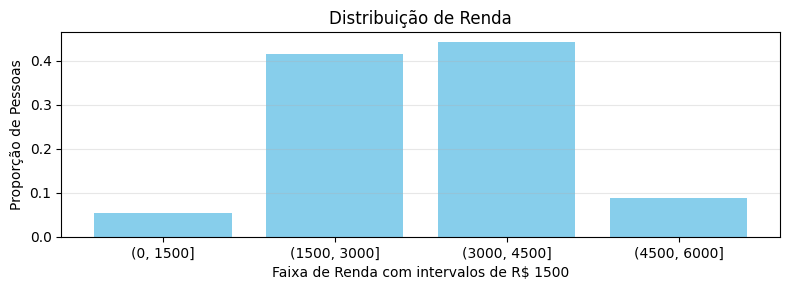

A faixa mais comum de renda é: (3000, 4500]

Função Densidade de Probabilidade (PDF) da Renda:
(0, 1500]       0.000037
(1500, 3000]    0.000276
(3000, 4500]    0.000295
(4500, 6000]    0.000059
Name: renda, dtype: float64


In [ ]:
# Definindo os intervalos
intervalo_renda = 1500

# Criando os intervalos
faixas_renda = range(0, int(df['renda'].max()) + intervalo_renda, intervalo_renda)

# Contando o número de pessoas em cada faixa de renda
contagem_por_faixa = pd.cut(df['renda'], bins=faixas_renda).value_counts().sort_index()

# Calculando a proporção de pessoas em cada faixa de renda
proporcao_por_faixa = contagem_por_faixa / len(df)

# Encontrando a faixa com o maior número de pessoas
faixa_mais_comum = proporcao_por_faixa.idxmax()

# Plotando o histograma da renda
plt.figure(figsize=(8, 3))
plt.bar(proporcao_por_faixa.index.astype(str), proporcao_por_faixa, width=0.8, color='skyblue')
plt.xlabel('Faixa de Renda com intervalos de R$ 1500')
plt.ylabel('Proporção de Pessoas')
plt.title('Distribuição de Renda')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

print("A faixa mais comum de renda é:", faixa_mais_comum)

# Calculando a função densidade de probabilidade (PDF)
pdf = proporcao_por_faixa / intervalo_renda

print("\nFunção Densidade de Probabilidade (PDF) da Renda:")
print(pdf)


5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [ ]:
media_renda = df.renda.mean()
media_renda

3082.5371800000003

In [ ]:
var_renda = df.renda.var()
var_renda

993156.2281676152

Média da renda da amostra: 3082.5371800000003
Variância da renda da amostra: 993156.2281676152


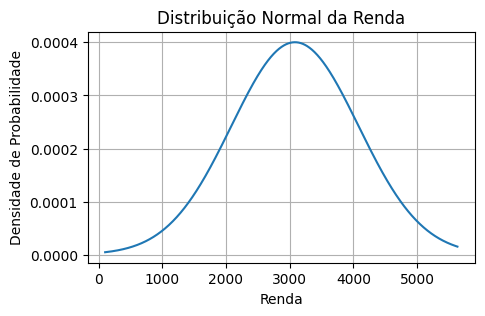

In [ ]:
print("Média da renda da amostra:", media_renda)
print("Variância da renda da amostra:", var_renda)
# Criando a distribuição normal
renda_min = df['renda'].min()
renda_max = df['renda'].max()
x = np.linspace(renda_min, renda_max, 1000)
pdf = norm.pdf(x, loc=media_renda, scale=np.sqrt(var_renda))

# Plotando o gráfico da distribuição normal
plt.figure(figsize=(5, 3))
plt.plot(x, pdf, label='Distribuição Normal')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
total_pessoas = len(df)
total_pessoas

1000

In [ ]:
pos_grad_count = len(df[df['escolaridade'] == 'Pós-graduação'])
pos_grad_count

253

In [ ]:
# Proporção de pessoas com pós-graduação
prop_pos_grad = pos_grad_count / total_pessoas
prop_pos_grad

0.253

In [ ]:
# Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes
total_populacao = 1000000
pessoas_pos_grad = 243000

probabilidade = prop_pos_grad ** pessoas_pos_grad * (1 - prop_pos_grad) ** (total_populacao - pessoas_pos_grad)

print("Probabilidade:", probabilidade)


Probabilidade: 0.0


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
# Contagem de ocorrências
contagem_escolaridade = df['escolaridade'].value_counts()

# Ordenando
niveis_escolaridade = contagem_escolaridade.index.tolist()

# Proporção acumulada
densidade_acumulada = []
total = contagem_escolaridade.sum()
cumulative_sum = 0
for nivel in niveis_escolaridade:
    count = contagem_escolaridade[nivel]
    cumulative_sum += count
    densidade_acumulada.append(cumulative_sum / total)

# Criar um DataFrame com os resultados
df_densidade_acumulada = pd.DataFrame({
    'Nível de Escolaridade': niveis_escolaridade,
    'Densidade Acumulada': densidade_acumulada
})

print(df_densidade_acumulada)


  Nível de Escolaridade  Densidade Acumulada
0           Fundamental                0.266
1         Pós-graduação                0.519
2              Superior                0.762
3                 Médio                1.000


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
# Proporção - nível de inglês intermediário
prop_intermediario = len(df[df['nível de proficiência em inglês'] == 'Intermediário']) / len(df)
prop_intermediario

0.329

In [ ]:
# Tamanho da amostra
n = len(df)

# Nível de confiança
confianca = 0.95

# Valor crítico correspondente ao nível de confiança
z = 1.96  # para 95% de confiança

# Calculando a margem de erro amostral
margem_erro = z * np.sqrt((prop_intermediario * (1 - prop_intermediario)) / n)

print("Margem de erro amostral:", margem_erro)


Margem de erro amostral: 0.029121603225097343


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
media_renda = df['renda'].mean()
media_renda

3082.5371800000003

In [ ]:
# Número de pessoas na população
n_populacao = len(df)

# Número de pessoas com renda mil reais superior à média
n_superior_media = 60

# Probabilidade de uma pessoa ter renda mil reais superior à média
probabilidade_individual = len(df[df['renda'] > media_renda + 1000]) / n_populacao

# Calculando a probabilidade usando a distribuição binomial
probabilidade = binom.pmf(n_superior_media, n_populacao, probabilidade_individual)
probabilidade

1.099520565163774e-22

10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
# Filtrando o DataFrame
filtro = (df['estado'].isin(['SP', 'RJ', 'ES', 'MG'])) & (df['sexo'] == 'M') & (df['escolaridade'] == 'Fundamental') & (df['renda'] > 2000)
pessoas_sudeste_homem_fundamental_renda_maior_2mil = df[filtro]


In [ ]:
# Contagem de pessoas que atendem aos critérios
num_pessoas_atendem_critérios = len(pessoas_sudeste_homem_fundamental_renda_maior_2mil)
num_pessoas_atendem_critérios

19

In [ ]:
# Contagem de pessoas no Sudeste
num_pessoas_sudeste = len(df[df['estado'].isin(['SP', 'RJ', 'ES', 'MG'])])

# Probabilidade de escolher alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês
probabilidade = num_pessoas_atendem_critérios / num_pessoas_sudeste

print("Probabilidade:", probabilidade)


Probabilidade: 0.12101910828025478
